In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.linalg import orth
from tensorly.decomposition import tucker

import tensor_utils as utils

np.random.seed(14159)

In [2]:
d = 3
n = np.array([50, 100, 150])
r = np.array([5, 10, 15])
N = np.sum(n)

In [3]:
frobH_r = np.linspace(0, 20, 50)
dist = np.zeros((len(frobH_r), d))
for i, frobH in enumerate(tqdm(frobH_r)):
    H = np.random.randn(*r)
    H = frobH*H/utils.frob(H)
    X = [orth(np.random.randn(n[i], r[i])) for i in range(d)]
    Z = np.random.randn(*n)
    T = utils.tucker_prod(H, X)+Z/np.sqrt(N)
    G, U = tucker(T, r)
    for j in range(d):
        dist[i, j] = utils.frob(X[j]@X[j].T-U[j]@U[j].T)/np.sqrt(2)

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\hug97\anaconda3\lib\site-packages\tensorly\tucker_tensor.py:323: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if rank == 'same':
100%|██████████| 50/50 [08:56<00:00, 10.74s/it]


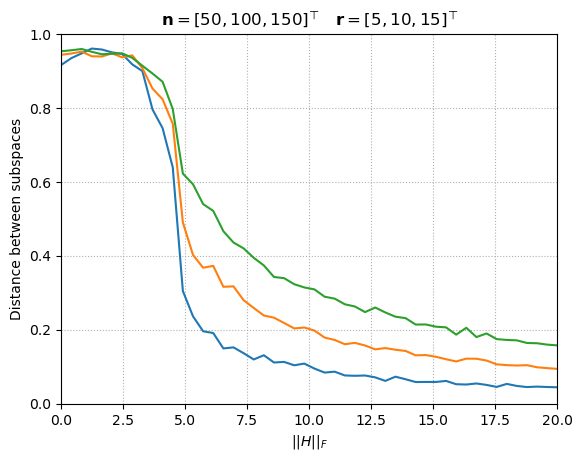

In [5]:
plt.plot(frobH_r, dist/np.sqrt(r))
plt.grid(ls=':')
plt.xlim(frobH_r[0], frobH_r[-1])
plt.ylim(0, 1)
plt.xlabel("$||H||_F$")
plt.ylabel("Distance between subspaces")
plt.title("$\\mathbf{{n}} = {{{}}}^\\top \\quad \\mathbf{{r}} = {{{}}}^\\top$".format(list(n), list(r)));